# 第三部分：机器学习——预测期望的薪资
本次项目分为三部分：

第一部分：原始数据爬取

第二部分：数据可视化展示

第三部分：机器学习——预测期望的薪资

本人的工作分配为第三部分。

## 一、项目概述
1. 数据集为爬取的java职位招聘信息，本部分将 salary 属性作为标签，将其他属性作为输入，训练出一个预测期望薪资的模型。

2. 本项目主要使用 sklearn 框架

3. 本项目以均方根差作为模型预测性能的评价标准。

## 二、数据获取并可视化展示
本部分由本小组其他两位成员分别完成。

## 三、为机器学习算法准备数据
1. salary 属性: 处理为数值属性，取区间端点的平均值，单位为（万元/月），并从数据集中分离出来作为标签

2. position 属性: 分类为：java资深, java高级, java中级, java开发, java实习

3. company_name 属性: 直接删掉

4. city 属性: 提取出城市名，分类为：一线、新一线、二线、三线及以下

5. education 属性: 将个别不是教育信息的内容，填充为众数：本科

6. welfare 属性: 直接删掉

7. company_major 属性: 分类为：计算机硬件、计算机软件、其他行业

### 1. 加载数据

In [1]:
import pandas as pd

jobs = pd.read_csv("data/info.csv")

In [2]:
jobs.head()

,Unnamed: 0,position,salary,company_name,city,experience,education,welfare,company_type,company_scale,company_major,_id
0,0,高级应用软件开发工程师（java）,1.5-2万/月,杭州海康威视数字技术股份有限公司,南京,无工作经验,招4人,NaN,上市公司,10000人以上,通信/电信/网络设备,5dc8e2615955fa04c54b9674
1,1,Java开发工程师,1-1.5万/月,中软国际科技服务有限公司,深圳-南山区,2年经验,大专,NaN,合资,10000人以上,计算机软件,5dc8e2625955fa04c54b9675
2,2,Java开发工程师,1.2-1.5万/月,神州数码通用软件（北京）有限公司,上海,3-4年经验,本科,"五险一金,带薪年假,定期体检,定期团建",外资（非欧美）,500-1000人,计算机软件,5dc8e2635955fa04c54b9676
3,3,Java中级开发工程师,0.8-1.6万/月,苏州玩友时代科技股份有限公司,苏州-工业园区,无工作经验,招2人,"五险一金,年终奖金,绩效奖金,专业培训,定期体检,弹性工作",民营公司,1000-5000人,网络游戏,5dc8e2645955fa04c54b9677
4,4,Java开发工程师,0.8-1万/月,深圳市库袋科技有限公司,深圳-南山区,无工作经验,大专,"做五休二,带薪年假,包住宿,五险一金,绩效奖金",民营公司,50-150人,计算机软件,5dc8e2655955fa04c54b9678


In [3]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9524 entries, 0 to 9523
Data columns (total 12 columns):
Unnamed: 0       9524 non-null int64
position         9524 non-null object
salary           9524 non-null object
company_name     9524 non-null object
city             9524 non-null object
experience       9524 non-null object
education        9524 non-null object
welfare          8011 non-null object
company_type     9524 non-null object
company_scale    9431 non-null object
company_major    9524 non-null object
_id              9524 non-null object
dtypes: int64(1), object(11)
memory usage: 893.0+ KB


### 2. 定义数据处理的管道函数

In [4]:
import re

# salary 属性处理函数
def salary_process(data):
    unit1 = u'万/年'
    unit2 = u'千/月'
    unit3 = u'元/天'
    unit4 = u'万/月'
    column = data['salary'].copy()
    
    for i in range(0, len(data)):
        if unit1 in column[i]:
            x = re.findall(r'\d*\.?\d+', column[i])
            data.loc[i, 'salary'] = format((float(x[0]) + float(x[1])) / 24, '.2f')
        elif unit2 in column[i]:
            x = re.findall(r'\d*\.?\d+', column[i])
            data.loc[i, 'salary'] = format((float(x[0]) + float(x[1])) * 0.05, '.2f')
        elif unit3 in column[i]:
            x = re.findall(r'\d*', column[i])
            data.loc[i, 'salary'] = format(float(x[0]) * 20 / 10000, '.2f')
        elif unit4 in column[i]:
            x = re.findall(r'\d*\.?\d+', column[i])
            data.loc[i, 'salary'] = format((float(x[0]) + float(x[1])) * 0.5, '.2f')
        else:
            x = re.findall(r'\d*', column[i])
            data.loc[i, 'salary'] = format(float(x[0]) * 0.1, '.2f')


In [5]:
# position 属性处理函数
def position_process(data):
    top1 = u'架构'
    top2 = u'资深'
    top3 = u'经理'
    high1 = u'高级'
    mid1 = u'中级'
    prac1 = u'实习'
    prac2 = u'培训'
    column = data['position']
    
    for i in range(0, len(data)):
        if (prac1 in column[i]) or (prac1 in column[i]):
            data.loc[i, "position"] = "java实习"
        elif (top1 in column[i]) or (top2 in column[i]) or (top3 in column[i]):
            data.loc[i, "position"] = "java资深"
        elif high1 in column[i]:
            data.loc[i, "position"] = "java高级"
        elif mid1 in column[i]:
            data.loc[i, "position"] = "java中级"
        else:
            data.loc[i, "position"] = "java开发"

In [6]:
# city 属性处理函数
def city_process(data):
    cities1 = ("上海", "广州", "深圳", "北京")
    cities2 = ("成都", "杭州", "重庆", "武汉", "西安", "苏州", "天津", "南京", "长沙","郑州",
               "东莞", "青岛", "沈阳", "宁波", "昆明")
    cities3 = ("厦门", "福州", "无锡", "合肥", "昆明", "哈尔滨", "济南", "佛山", "长春", "温州",
               "石家庄", "南宁", "常州", "泉州", "南昌", "贵阳", "太原", "烟台", "嘉兴", "南通",
               "金华", "珠海", "惠州", "徐州", "海口", "乌鲁木齐", "绍兴", "中山", "台州", "兰州")
    
    data['city'] = data['city'].str.split('-', 0)
    for i in range(0, len(data)):
        data.loc[i, 'city'] = data.loc[i, 'city'][0]
        if data.loc[i, 'city'] in cities1:
            data.loc[i, 'city'] = "一线"
        elif data.loc[i, 'city'] in cities2:
            data.loc[i, 'city'] = "新一线"
        elif data.loc[i, 'city'] in cities3:
            data.loc[i, 'city'] = "二线"
        else:
            data.loc[i, 'city'] = "三线及以下"

In [7]:
# education 属性处理函数
def education_process(data):
    degrees = ("硕士", "本科", "大专")
    for i in range(0, len(data)):
        if "招" in data.loc[i, 'education']:
            data.loc[i, 'education'] = "本科"
        elif data.loc[i, 'education'] not in degrees:
            data.loc[i, 'education'] = "大专以下"

In [8]:
# company_type 属性处理函数
def company_type_process(data):
    types = ("民营公司", "上市公司", "合资", "国企", "外资（非欧美）", "外资（欧美）", "创业公司")
    for i in range(0, len(data)):
        if data.loc[i, 'company_type'] not in types:
            data.loc[i, 'company_major'] = "其他"

In [9]:
# company_major 属性处理函数
def company_major_process(data):
    soft = ('计算机软件', '互联网/电子商务', '计算机服务(系统、数据服务、维修)', '网络游戏')
    hard = ('电子技术/半导体/集成电路', '通信/电信/网络设备', '通信/电信运营、增值服务', '计算机硬件')
    
    for i in range(0, len(data)):
        if data.loc[i, 'company_major'] in soft:
            data.loc[i, 'company_major'] = "计算机软件"
        elif data.loc[i, 'company_major'] in hard:
            data.loc[i, 'company_major'] = "计算机硬件"
        else:
            data.loc[i, 'company_major'] = '其他行业'

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class data_process(BaseEstimator, TransformerMixin):
    
    def fit(self, data, y=None):
        return self
    
    def transform(self, data, y=None):
        data = data.drop("_id", axis=1)
        data = data.drop("Unnamed: 0", axis=1)
        data = data.drop("company_name", axis=1)
        data = data.drop("welfare", axis=1)
        
        data['company_scale'].fillna(data['company_scale'].mode()[0], inplace=True)
        
        salary_process(data)
        position_process(data)
        city_process(data)
        education_process(data)
        company_type_process(data)
        company_major_process(data)
        
        # 对离散型变量独热编码函数
        data = pd.get_dummies(data, 
                      columns=['position', 'city', 'experience', 'education',
                               'company_type', 'company_scale', 'company_major'],
                      drop_first=True)
        
        return data
    
# 定义一个来处理数据的管道 pipe_line
pipe_line = Pipeline([('dp', data_process())])

### 3. 分离出测试集及标签并进行处理

In [11]:
jobs = pipe_line.fit_transform(jobs)

In [12]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(jobs, test_size = 0.2, random_state = 43)
print(len(train), " train  + ", len(test), " test")

7619  train  +  1905  test


In [13]:
train_y = train["salary"]
train_X = train.drop("salary", axis=1)

test_y = test["salary"]
test_X = test.drop("salary", axis=1)

In [14]:
train_X.head(10)

,position_java实习,position_java开发,position_java资深,position_java高级,city_三线及以下,city_二线,city_新一线,experience_1年经验,experience_2年经验,experience_3-4年经验,...,company_type_民营公司,company_type_非营利组织,company_scale_10000人以上,company_scale_150-500人,company_scale_50-150人,company_scale_500-1000人,company_scale_5000-10000人,company_scale_少于50人,company_major_计算机硬件,company_major_计算机软件
5733,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
1942,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3092,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
7687,0,1,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,1
4498,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
1955,0,1,0,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
733,0,1,0,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
1826,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
247,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
696,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0


In [15]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7619 entries, 5733 to 3392
Data columns (total 37 columns):
position_java实习              7619 non-null uint8
position_java开发              7619 non-null uint8
position_java资深              7619 non-null uint8
position_java高级              7619 non-null uint8
city_三线及以下                   7619 non-null uint8
city_二线                      7619 non-null uint8
city_新一线                     7619 non-null uint8
experience_1年经验              7619 non-null uint8
experience_2年经验              7619 non-null uint8
experience_3-4年经验            7619 non-null uint8
experience_5-7年经验            7619 non-null uint8
experience_8-9年经验            7619 non-null uint8
experience_无工作经验             7619 non-null uint8
education_大专以下               7619 non-null uint8
education_本科                 7619 non-null uint8
education_硕士                 7619 non-null uint8
company_type_500-1000人       7619 non-null uint8
company_type_上市公司            7619 non-null uint8
company_

In [34]:
train_y.head(10)

5733    1.75
1942    1.25
3092    0.90
7687    1.55
4498    0.65
1955    1.00
733     1.25
1826    0.90
247     2.15
696     1.15
Name: salary, dtype: object

## 四、训练模型

### 1. 线性回归

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
lin_reg.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# 使用交叉验证评估模型性能
import numpy as np

scores = cross_val_score(lin_reg, train_X, train_y, 
                         scoring = "neg_mean_squared_error", cv = 9)
scores = np.sqrt(-scores)
def display_scores(scores):
    print("scores: ", scores)
    print("mean: ", scores.mean(), "万元/月")
display_scores(scores)

scores:  [0.45339544 0.499437   0.46191241 0.42559232 0.44558929 0.44610164
 0.46430119 0.45818662 0.51057713]
mean:  0.462788114058477 万元/月


### 2. 决策树

In [19]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [20]:
# 使用交叉验证评估模型性能
scores = cross_val_score(tree_reg, train_X, train_y, 
                         scoring = "neg_mean_squared_error", cv = 9)
scores = np.sqrt(-scores)
def display_scores(scores):
    print("scores: ", scores)
    print("mean: ", scores.mean(), "万元/月")
display_scores(scores)

scores:  [0.52061201 0.54193563 0.54375103 0.4852951  0.53865431 0.54230909
 0.54685378 0.53244279 0.58940235]
mean:  0.5379173433100977 万元/月


### 3. 支持向量机

In [21]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1, gamma='auto')
svr_rbf.fit(train_X, train_y)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [22]:
# 使用交叉验证评估模型性能
scores = cross_val_score(svr_rbf, train_X, train_y, 
                         scoring = "neg_mean_squared_error", cv = 9)
scores = np.sqrt(-scores)
def display_scores(scores):
    print("scores: ", scores)
    print("mean: ", scores.mean(), "万元/月")
display_scores(scores)

scores:  [0.45491063 0.50752324 0.45502532 0.43264701 0.44403629 0.44980514
 0.46735051 0.46284628 0.51736916]
mean:  0.465723729259495 万元/月


### 4. 随机森林

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10)
rf.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [24]:
# 使用交叉验证评估模型性能
scores = cross_val_score(rf, train_X, train_y, 
                         scoring = "neg_mean_squared_error", cv = 9)
scores = np.sqrt(-scores)
def display_scores(scores):
    print("scores: ", scores)
    print("mean: ", scores.mean())
    print("standard deviation: ", scores.std())
display_scores(scores)

scores:  [0.48939559 0.52840232 0.4919467  0.46900445 0.48716732 0.50296904
 0.49866791 0.48424963 0.5334001 ]
mean:  0.49835589331879215
standard deviation:  0.01960528600829023


### 5. 模型融合
选取表现较好的线性回归模型和支持向量机模型进行模型融合

In [25]:
def ensemble_model(X):
    predictions1 = lin_reg.predict(X)
    predictions2 = svr_rbf.predict(X)
    predictions = (predictions1 + predictions2) / 2
    return predictions

## 五、评估模型性能

In [26]:
# 在评估性能之前，我们首先看看工资的分布情况

jobs_copy = pd.read_csv("data/info.csv")
salary_process(jobs_copy)
jobs_copy["salary"] = pd.to_numeric(jobs_copy["salary"])

[0, 5, 0, 1.0]

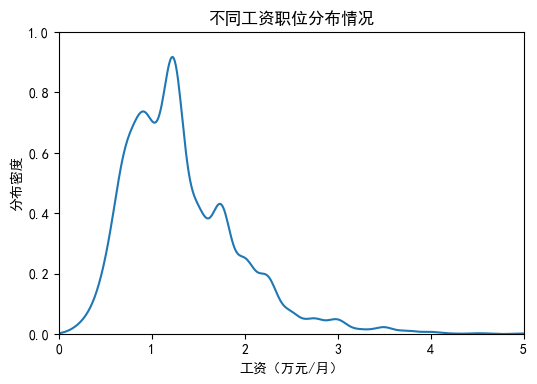

In [27]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['savefig.dpi'] = 100 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率

jobs_copy["salary"].plot(kind='kde')
plt.xlabel("工资（万元/月）")
plt.ylabel("分布密度") 
plt.title("不同工资职位分布情况")
plt.axis([0, 5, 0, 1.0])

In [28]:
jobs_copy["salary"].describe()

count    9524.000000
mean        1.329523
std         0.623393
min         0.100000
25%         0.900000
50%         1.250000
75%         1.700000
max         6.000000
Name: salary, dtype: float64

In [29]:
# 在测试集上评估性能
from sklearn.metrics import mean_squared_error

predictions = ensemble_model(test_X)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)
print("均方根差：", rmse, "万元/月")

均方根差： 0.4079549357545811 万元/月


In [30]:
# 查看测试集上部分样本的具体表现
from random import randint

real = list(float(x) for x in test_y)
pred = [int(x * 100) / 100 for x in predictions]

def check(num=10):
    random_int = [randint(0, len(real)-1) for i in range(num)]
    for i in range(num):
        print("真实值：", real[random_int[i]], "\t预测值:", 
              pred[random_int[i]], "\t(万元/月)")

In [33]:
# 测试集上随机查看10个样本表现
check(10)

真实值： 1.75 	预测值: 1.68 	(万元/月)
真实值： 1.15 	预测值: 1.7 	(万元/月)
真实值： 1.25 	预测值: 0.99 	(万元/月)
真实值： 1.5 	预测值: 1.38 	(万元/月)
真实值： 1.15 	预测值: 1.16 	(万元/月)
真实值： 1.5 	预测值: 2.36 	(万元/月)
真实值： 1.4 	预测值: 1.38 	(万元/月)
真实值： 1.75 	预测值: 1.65 	(万元/月)
真实值： 1.25 	预测值: 0.88 	(万元/月)
真实值： 1.75 	预测值: 1.86 	(万元/月)


### 结论：工资大部分分布在 0.6~2.0 万/月 的范围，0.40 万/月 的均方根误差在可接受范围内